In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
#Upload the Dataset
hike=pd.read_csv("D:\CSV FIles Path\Assignments\Simple Linear Regression\Salary_Data.csv")
hike

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
hike.shape

(30, 2)

In [4]:
hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
hike.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [7]:
hike.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
hike[hike.duplicated()]

,YearsExperience,Salary


In [9]:
# Rename the Column
hike=hike.rename({'YearsExperience':'Experience'}, axis=1)

In [10]:
hike

,Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [11]:
hike.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Danny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

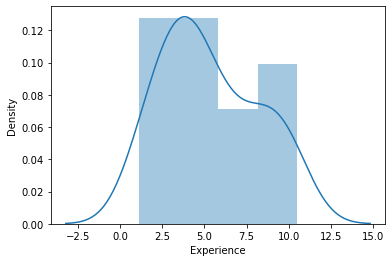

In [12]:
sns.distplot(hike['Experience'])

C:\Users\Danny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

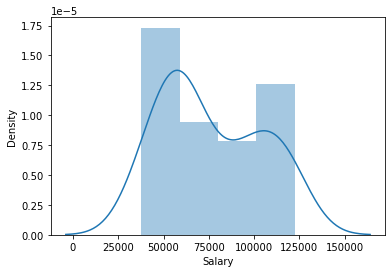

In [13]:
sns.distplot(hike['Salary'])

In [14]:
hike.isnull().sum()

Experience    0
Salary        0
dtype: int64

In [15]:
#Fitting a Simple Linear Regression Model
import statsmodels.formula.api as smf

In [16]:
model = smf.ols("Salary~Experience",data = hike).fit()

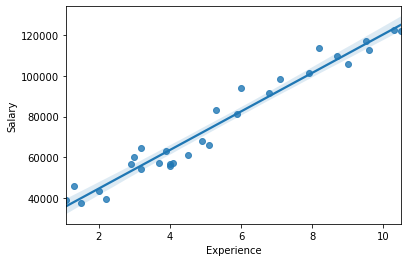

In [17]:
#Build Plot to check the Regresssion Lines and the Slope
sns.regplot(x="Experience", y="Salary", data=hike);

In [18]:
# Identify the Coefficients
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [19]:
# Finding #t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     11.346940
Experience    24.950094
dtype: float64 
 Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64


In [20]:
# Find the Accuracy of Regression Equation by USINGg R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## More than 0.90 is an Excellent Regression Value

In [22]:
#Predict for NEW DATA POINT 8Years and 10Years of Experience
newexp=pd.Series([8,10])
newexp

0     8
1    10
dtype: int64

In [23]:
#Displaying the NEW DATA Point in a Dataframe
exp=pd.DataFrame(newexp,columns=['Experience'])
exp

,Experience
0,8
1,10


### Predicting Salary for 8Years and 10Years of Experience

In [24]:
model.predict(exp)

0    101391.898770
1    120291.823413
dtype: float64

In [25]:
# Manually Calculating the Predicted value
25792.200199+(9449.962321*8)

101391.898767

In [26]:
25792.200199+(9449.962321*10)

120291.823409

In [27]:
# Fitting the New Predicted Value in the Original DATASET
hike['Salary Prediction']=model.fittedvalues
hike

,Experience,Salary,Salary Prediction
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788


### RUN Prediction Model for 8Years and 10Years of Experience

In [29]:
exp['Salary Prediction']=model.predict(exp)
exp

,Experience,Salary Prediction
0,8,101391.898770
1,10,120291.823413
